Single Sample t-test

In [1]:
#Import Packages 
import pandas as pd 
import numpy as np
from scipy.stats import norm
from scipy import stats

In [2]:
#Import data
pokemonGlobal = pd.read_csv("../Data/300k.csv", low_memory=False)
pokemonGlobal

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,False,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39.119052,-76.633194,2016-09-02T21:50:11,MzM1MzA0NjEyNTIxNTQ1OTY5Mw==,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,...,False,False,False,False,False,False,False,False,False,19
296017,13,47.142237,7.244752,2016-09-02T21:50:08,NjA0NDc3OTcxMzk2NjM5MzgyMQ==,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,...,False,False,False,False,False,False,False,False,False,13
296018,16,42.258532,-87.881248,2016-09-02T21:50:07,OTIzODI4ODYyOTUyMjI4NzI0NQ==,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,...,False,False,False,False,False,False,False,False,False,16
296019,19,26.230929,-98.194772,2016-09-02T21:50:07,MTcwMjEwNDQ3Mjk1MjIwOTM5NDk=,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,...,False,False,False,False,False,False,False,False,False,19


In [3]:
#Drop unnecessary columns
pokemonGlobal2 = pokemonGlobal.drop(['_id','gymIn100m', 'gymIn250m', 'gymIn500m', 'gymIn1000m',
                          'gymIn2500m', 'gymIn5000m', 
                            'cooc_1', 'cooc_2', 'cooc_3', 'cooc_4', 
                            'cooc_5', 'cooc_6', 'cooc_7', 'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'cooc_12', 'cooc_13', 'cooc_14', 'cooc_15', 
                            'cooc_16', 'cooc_17', 'cooc_18', 'cooc_19', 'cooc_20', 'cooc_21', 'cooc_22', 'cooc_23', 'cooc_24', 'cooc_25', 'cooc_26',
                             'cooc_27', 'cooc_28', 'cooc_29', 'cooc_30', 'cooc_31', 'cooc_32', 'cooc_33', 'cooc_34', 'cooc_35', 'cooc_36',
                              'cooc_37', 'cooc_38', 'cooc_39', 'cooc_40', 'cooc_41', 'cooc_42', 'cooc_43', 'cooc_44', 'cooc_45', 'cooc_46',
                              'cooc_47', 'cooc_48', 'cooc_49', 'cooc_50', 'cooc_51', 'cooc_52', 'cooc_53', 'cooc_54', 'cooc_55', 'cooc_56', 'cooc_57',
                              'cooc_58', 'cooc_59', 'cooc_60', 'cooc_61', 'cooc_62', 'cooc_63', 'cooc_64', 'cooc_65', 'cooc_66', 'cooc_67', 'cooc_68',
                              'cooc_69', 'cooc_70', 'cooc_71', 'cooc_72', 'cooc_73', 'cooc_74', 'cooc_75', 'cooc_76', 'cooc_77',
                              'cooc_78', 'cooc_79', 'cooc_80', 'cooc_81', 'cooc_82', 'cooc_83', 'cooc_84', 'cooc_85', 'cooc_86', 'cooc_87', 'cooc_88',
                              'cooc_89', 'cooc_90', 'cooc_91', 'cooc_92', 'cooc_93', 'cooc_94', 'cooc_95', 'cooc_96', 'cooc_97', 'cooc_98',
                              'cooc_99', 'cooc_100', 'cooc_101', 'cooc_102', 'cooc_103', 'cooc_104', 'cooc_105', 'cooc_106', 'cooc_107', 'cooc_108',
                              'cooc_109', 'cooc_110', 'cooc_111', 'cooc_112', 'cooc_113', 'cooc_114', 'cooc_115', 'cooc_116', 'cooc_117', 'cooc_118',
                              'cooc_119', 'cooc_120', 'cooc_121', 'cooc_122', 'cooc_123', 'cooc_124', 'cooc_125', 'cooc_126', 'cooc_127', 'cooc_128',
                              'cooc_129', 'cooc_130', 'cooc_131', 'cooc_132', 'cooc_133', 'cooc_134', 'cooc_135', 'cooc_136', 'cooc_137', 'cooc_138',
                              'cooc_139', 'cooc_140', 'cooc_141', 'cooc_142', 'cooc_143', 'cooc_144', 'cooc_145', 'cooc_146', 'cooc_147', 'cooc_148',
                              'cooc_149', 'cooc_150', 'cooc_151', 'gymDistanceKm', 'sunsetMinute', 'sunsetMinutesMidnight', 'sunriseMinute', 
                            'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m', 'cellId_1460m',
             'cellId_2920m', 'cellId_5850m'], axis=1)

In [4]:
pokemonGlobal2

,pokemonId,latitude,longitude,appearedLocalTime,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,...,midurban,rural,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,night,5,57,dummy_day,8,8,...,True,False,0.081776,True,True,True,True,True,True,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,night,5,57,dummy_day,8,8,...,True,False,0.195622,False,True,True,True,True,True,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,night,5,57,dummy_day,8,8,...,True,False,0.338602,False,False,True,True,True,True,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,night,5,56,dummy_day,8,8,...,True,False,0.109479,False,True,True,True,True,True,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,night,5,56,dummy_day,8,8,...,True,False,0.040364,True,True,True,True,True,True,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39.119052,-76.633194,2016-09-02T21:50:11,night,23,50,Tuesday,2,8,...,True,False,0.448595,False,False,True,True,True,True,19
296017,13,47.142237,7.244752,2016-09-02T21:50:08,night,23,50,Tuesday,2,8,...,True,False,0.104007,False,True,True,True,True,True,13
296018,16,42.258532,-87.881248,2016-09-02T21:50:07,night,23,50,Tuesday,2,8,...,True,False,0.131721,False,True,True,True,True,True,16
296019,19,26.230929,-98.194772,2016-09-02T21:50:07,night,23,50,Tuesday,2,8,...,True,False,1.743821,False,False,False,False,True,True,19


In [5]:
#View data types
pokemonGlobal2.dtypes

pokemonId                   int64
latitude                  float64
longitude                 float64
appearedLocalTime          object
appearedTimeOfDay          object
appearedHour                int64
appearedMinute              int64
appearedDayOfWeek          object
appearedDay                 int64
appearedMonth               int64
appearedYear                int64
terrainType                 int64
closeToWater                 bool
city                       object
continent                  object
weather                    object
temperature               float64
windSpeed                 float64
windBearing                 int64
pressure                  float64
weatherIcon                object
sunriseMinutesMidnight      int64
sunriseHour                 int64
sunriseMinutesSince         int64
sunsetHour                  int64
sunsetMinutesBefore         int64
population_density        float64
urban                        bool
suburban                     bool
midurban      

In [6]:
#Change floats to integers
pokemonGlobal2.latitude = pokemonGlobal2.latitude.astype(int)
pokemonGlobal2.longitude = pokemonGlobal2.longitude.astype(int)
pokemonGlobal2.temperature = pokemonGlobal2.temperature.astype(int)
pokemonGlobal2.windSpeed = pokemonGlobal2.windSpeed.astype(int)
pokemonGlobal2.pressure = pokemonGlobal2.pressure.astype(int)
pokemonGlobal2.population_density = pokemonGlobal2.population_density.astype(int)

In [7]:
#View data types
pokemonGlobal2.dtypes

pokemonId                  int64
latitude                   int32
longitude                  int32
appearedLocalTime         object
appearedTimeOfDay         object
appearedHour               int64
appearedMinute             int64
appearedDayOfWeek         object
appearedDay                int64
appearedMonth              int64
appearedYear               int64
terrainType                int64
closeToWater                bool
city                      object
continent                 object
weather                   object
temperature                int32
windSpeed                  int32
windBearing                int64
pressure                   int32
weatherIcon               object
sunriseMinutesMidnight     int64
sunriseHour                int64
sunriseMinutesSince        int64
sunsetHour                 int64
sunsetMinutesBefore        int64
population_density         int32
urban                       bool
suburban                    bool
midurban                    bool
rural     

In [8]:
#Rename columns to help merge
pokemonGlobal2.rename(columns={'class' : 'num'}, inplace=True)
pokemonGlobal2

,pokemonId,latitude,longitude,appearedLocalTime,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,...,midurban,rural,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,num
0,16,20,-97,2016-09-08T03:57:45,night,5,57,dummy_day,8,8,...,True,False,0.081776,True,True,True,True,True,True,16
1,133,20,-97,2016-09-08T03:57:37,night,5,57,dummy_day,8,8,...,True,False,0.195622,False,True,True,True,True,True,133
2,16,38,-77,2016-09-08T03:57:25,night,5,57,dummy_day,8,8,...,True,False,0.338602,False,False,True,True,True,True,16
3,13,47,-122,2016-09-08T03:56:22,night,5,56,dummy_day,8,8,...,True,False,0.109479,False,True,True,True,True,True,13
4,133,47,-122,2016-09-08T03:56:08,night,5,56,dummy_day,8,8,...,True,False,0.040364,True,True,True,True,True,True,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39,-76,2016-09-02T21:50:11,night,23,50,Tuesday,2,8,...,True,False,0.448595,False,False,True,True,True,True,19
296017,13,47,7,2016-09-02T21:50:08,night,23,50,Tuesday,2,8,...,True,False,0.104007,False,True,True,True,True,True,13
296018,16,42,-87,2016-09-02T21:50:07,night,23,50,Tuesday,2,8,...,True,False,0.131721,False,True,True,True,True,True,16
296019,19,26,-98,2016-09-02T21:50:07,night,23,50,Tuesday,2,8,...,True,False,1.743821,False,False,False,False,True,True,19


In [9]:
#Subset data 
pokemonGlobalsubset1 = pokemonGlobal2[['num', 'appearedTimeOfDay', 'closeToWater', 'terrainType',
                                       'temperature', 'weather', 'pressure', 'windSpeed',]]
pokemonGlobalsubset2= pokemonGlobal2[['num', 'city', 'population_density',  'latitude', 'longitude',
                                     'pokestopDistanceKm', 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m']]

In [10]:
pokemonGlobalsubset1

,num,appearedTimeOfDay,closeToWater,terrainType,temperature,weather,pressure,windSpeed
0,16,night,False,14,25,Foggy,1018,4
1,133,night,False,14,25,Foggy,1018,4
2,16,night,False,13,24,Clear,1015,4
3,13,night,True,0,15,PartlyCloudy,1020,5
4,133,night,True,0,15,PartlyCloudy,1020,5
...,...,...,...,...,...,...,...,...
296016,19,night,True,13,25,Clear,1018,7
296017,13,night,False,5,15,Clear,1021,1
296018,16,night,True,13,21,Clear,1023,10
296019,19,night,False,13,36,Clear,1010,8


In [11]:
pokemonGlobalsubset2

,num,city,population_density,latitude,longitude,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m
0,16,Mexico_City,2431,20,-97,0.081776,True,True,True
1,133,Mexico_City,2431,20,-97,0.195622,False,True,True
2,16,New_York,761,38,-77,0.338602,False,False,True
3,13,Los_Angeles,4842,47,-122,0.109479,False,True,True
4,133,Los_Angeles,4842,47,-122,0.040364,True,True,True
...,...,...,...,...,...,...,...,...,...
296016,19,New_York,1265,39,-76,0.448595,False,False,True
296017,13,Zurich,1886,47,7,0.104007,False,True,True
296018,16,Chicago,475,42,-87,0.131721,False,True,True
296019,19,Chicago,849,26,-98,1.743821,False,False,False


In [12]:
#Import Data
PokemonSpawns = pd.read_csv("../Data/pokemon-spawns.csv")
PokemonSpawns

,s2_id,s2_token,num,name,lat,lng,encounter_ms,disppear_ms
0,-9.182900e+18,808fca40de3,1,Bulbasaur,37.352721,-121.965752,1.469520e+12,1.469520e+12
1,-9.182930e+18,808fb000163,1,Bulbasaur,37.386986,-122.173674,-1.000000e+00,1.469520e+12
2,-9.182910e+18,808fbfb5ca1,1,Bulbasaur,37.562587,-122.033979,1.469520e+12,1.469520e+12
3,-9.182960e+18,808f95fd6c5,1,Bulbasaur,37.577153,-122.082546,1.469520e+12,1.469520e+12
4,-9.182980e+18,808f7c2eb87,1,Bulbasaur,37.717652,-122.453226,1.469520e+12,1.469520e+12
...,...,...,...,...,...,...,...,...
314100,-9.185790e+18,8085845142b,148,Dragonair,37.860065,-122.485598,1.469560e+12,1.469560e+12
314101,-9.185790e+18,808580e0793,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12
314102,-9.185790e+18,808580e0793,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12
314103,-9.185790e+18,808580e0793,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12


In [13]:
#View Data Types
PokemonSpawns.dtypes

s2_id           float64
s2_token         object
num               int64
name             object
lat             float64
lng             float64
encounter_ms    float64
disppear_ms     float64
dtype: object

In [14]:
#Rename columns to help merge 
PokemonSpawns.rename(columns={'name': 'Pokemon'}, inplace=True)

In [15]:
#Drop unnecessary colums
PokemonSpawns2 = PokemonSpawns.drop(['s2_id', 's2_token'], axis=1)
PokemonSpawns2

,num,Pokemon,lat,lng,encounter_ms,disppear_ms
0,1,Bulbasaur,37.352721,-121.965752,1.469520e+12,1.469520e+12
1,1,Bulbasaur,37.386986,-122.173674,-1.000000e+00,1.469520e+12
2,1,Bulbasaur,37.562587,-122.033979,1.469520e+12,1.469520e+12
3,1,Bulbasaur,37.577153,-122.082546,1.469520e+12,1.469520e+12
4,1,Bulbasaur,37.717652,-122.453226,1.469520e+12,1.469520e+12
...,...,...,...,...,...,...
314100,148,Dragonair,37.860065,-122.485598,1.469560e+12,1.469560e+12
314101,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12
314102,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12
314103,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12


In [16]:
#Import dataset 
PokemonStats = pd.read_csv("../Data/PokemonGOData.csv")
PokemonStats

,Pokemon,Max CP,Max HP,Attack,Defense,Stamina,Total Stats,Is Legendary,Type 1,Type 2
0,Slaking,"4,431",233,290,166,284,740,False,normal,none
1,Regigigas,"4,346",184,287,210,221,718,True,normal,none
2,Mewtwo,"4,178",179,300,182,214,696,True,psychic,none
3,Groudon,"4,115",171,270,228,205,703,True,ground,none
4,Kyogre,"4,115",171,270,228,205,703,True,water,none
...,...,...,...,...,...,...,...,...,...,...
717,Magikarp,274,78,29,85,85,199,False,water,none
718,Zygarde,14,11,0,0,0,0,False,dragon,ground
719,Aegislash,14,11,0,0,0,0,False,steel,ghost
720,Doublade,14,11,0,0,0,0,False,steel,ghost


In [17]:
#View data types 
PokemonStats.dtypes

Pokemon         object
Max CP          object
Max HP           int64
Attack           int64
Defense          int64
Stamina          int64
Total Stats      int64
Is Legendary      bool
Type 1          object
Type 2          object
dtype: object

In [18]:
#Drop unecessary columns 
PokemonStats2 = PokemonStats.drop(['Max CP', 'Max HP', 'Attack', 'Defense', 'Stamina', 'Total Stats'], axis=1)
PokemonStats2

,Pokemon,Is Legendary,Type 1,Type 2
0,Slaking,False,normal,none
1,Regigigas,True,normal,none
2,Mewtwo,True,psychic,none
3,Groudon,True,ground,none
4,Kyogre,True,water,none
...,...,...,...,...
717,Magikarp,False,water,none
718,Zygarde,False,dragon,ground
719,Aegislash,False,steel,ghost
720,Doublade,False,steel,ghost


In [19]:
#Merge columns
Pokemon = pd.merge(PokemonSpawns2, PokemonStats2, on= 'Pokemon')

In [20]:
Pokemon

,num,Pokemon,lat,lng,encounter_ms,disppear_ms,Is Legendary,Type 1,Type 2
0,1,Bulbasaur,37.352721,-121.965752,1.469520e+12,1.469520e+12,False,grass,poison
1,1,Bulbasaur,37.386986,-122.173674,-1.000000e+00,1.469520e+12,False,grass,poison
2,1,Bulbasaur,37.562587,-122.033979,1.469520e+12,1.469520e+12,False,grass,poison
3,1,Bulbasaur,37.577153,-122.082546,1.469520e+12,1.469520e+12,False,grass,poison
4,1,Bulbasaur,37.717652,-122.453226,1.469520e+12,1.469520e+12,False,grass,poison
...,...,...,...,...,...,...,...,...,...
313423,148,Dragonair,37.860065,-122.485598,1.469560e+12,1.469560e+12,False,dragon,none
313424,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12,False,dragon,none
313425,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12,False,dragon,none
313426,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12,False,dragon,none


Change Datatypes 

In [21]:
Pokemon.dtypes

num               int64
Pokemon          object
lat             float64
lng             float64
encounter_ms    float64
disppear_ms     float64
Is Legendary       bool
Type 1           object
Type 2           object
dtype: object

In [22]:
Pokemon.num = Pokemon.num.astype(int)
Pokemon.lat = Pokemon.lat.astype(int)
Pokemon.lng = Pokemon.lng.astype(int)
Pokemon.encounter_ms = Pokemon.encounter_ms.astype(int)
Pokemon.disppear_ms = Pokemon.disppear_ms.astype(int)

In [23]:
Pokemon.dtypes

num              int32
Pokemon         object
lat              int32
lng              int32
encounter_ms     int32
disppear_ms      int32
Is Legendary      bool
Type 1          object
Type 2          object
dtype: object

In [31]:
#Merge 3rd dataset 
Pokemon2 =pd.merge(Pokemon, pokemonGlobalsubset1, on = 'num')

MemoryError: Unable to allocate 38.2 GiB for an array with shape (5126641867,) and data type int64

Data Wrangling 

In [4]:
def city (series):
    if series == "Adelaide":
        return 0
    if series == "Amman":
        return 1 
    if series == "Amsterdam":
        return 2 
    if series == "Athens":
        return 3
    if series == "Auckland":
        return 4 
    if series == "Bahai":
        return 5 
    if series == "Bangkok":
        return 6
    if series == "Belem":
        return 7
    if series == "Berlin":
        return 8
    if series == "Bogota":
        return 9 
    if series == "Boise":
        return 10
    if series == "Bratislava":
        return 11 
    if series == "Bribane":
        return 12 
    if series == "Brunie":
        return 13
    if series == "Bussels":
        return 14
    if series == "Bucharest":
        return 15
    if series == "Buenos_Aires":
        return 16
    if series == "Cairo":
        return 17 
    if series == "Casablanca":
        return 18
    if series == "Chicago":
        return 19
    if series == "Copenhagen":
        return 20
    if series == "Cordoba":
        return 21
    if series == "Costa_Rica":
        return 22 
    if series == "Damascus":
        return 23
    if series == "Denver":
        return 24 
    if series == "Detroit":
        return 25 
    if series == "Dubia":
        return 26
    if series == "Dublin":
        return 27 
    if series == "Edmonton":
        return 28
    if series == "Fortaleza":
        return 29 
    if series == "Guam":
        return 30 
    if series == "Guayaquil":
        return 31
    if series == "Guyana":
        return 32
    if series == "Halifax":
        return 33 
    if series == "Helsinki":
        return 34 
    if series == "Ho_Chi_Minh":
        return 35
    if series == "Hobart":
        return 36
    if series == "Hong_Kong":
        return 37
    if series == "Honolulu":
        return 38
    if series == "Indianapolis":
        return 39
    if series == "Isle_of_Man":
        return 40
    if series == "Istanbul":
        return 41
    if series == "Jakarta":
        return 42
    if series == "Jerusalem":
        return 43
    if series == "Karachi":
        return 44
    if series == "Kiev":
        return 45 
    if series == "Kolkata":
        return 46
    if series == "Kuala_Lumpur":
        return 47
    if series == "Kuching":
        return 48
    if series == "Lisbon":
        return 49
    if series == "Ljubljana":
        return 50
    if series == "London":
        return 51
    if series == "Los_Angeles":
        return 52
    if series == "Louisville":
        return 53
    if series == "Luanda":
        return 54
    if series == "Luxembourg":
        return 56
    if series == "Madrid":
        return 57
    if series == "Manila":
        return 58
    if series == "Melbourne":
        return 59
    if series == "Monrovia":
        return 60
    if series == "Mexico_City":
        return 61
    if series == "Monterrey":
        return 62
    if series == "Montreal":
        return 63
    if series == "Moscow":
        return 64
    if series == "New_York":
        return 65
    if series == "Olso":
        return 66
    if series == "Nicosia":
        return 67
    if series == "Narobi":
        return 68
    if series == "Noumea":
        return 69
    if series == "Paris":
        return 70
    if series == "Perth":
        return 71
    if series == "Phnom_Penh":
        return 72
    if series == "Phoenix":
        return 73
    if series == "Prague":
        return 74
    if series == "Puerto_Rico":
        return 75
    if series == "Regina":
        return 76
    if series == "Reykjavik":
        return 77
    if series == "Rome":
        return 78
    if series == "Santiago":
        return 79
    if series == "Sao_Paulo":
        return 80
    if series == "Sarajevo":
        return 81
    if series == "Singapore":
        return 82
    if series == "Stockholm":
        return 83 
    if series == "Sydney":
        return 84
    if series == "Tahiti":
        return 85
    if series == "Taipei":
        return 86
    if series == "Tokyo":
        return 87
    if series == "Toronto":
        return 88
    if series == "Tripoli":
        return 89
    if series == "Tunis":
        return 90
    if series == "Vancouver":
        return 91
    if series == "Vienna":
        return 92
    if series == "Vilnius":
        return 93
    if series == "Warsaw":
        return 94
    if series == "Winnipeg":
        return 95
    if series == "Zagreb":
        return 96
    if series == "Zurich":
        return 97

In [5]:
pokemon['cityR'] = pokemon['city'].apply(city)
pokemon

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,cityR
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,16,61.0
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,133,61.0
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,...,False,False,False,False,False,False,False,False,16,65.0
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,13,52.0
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,133,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39.119052,-76.633194,2016-09-02T21:50:11,MzM1MzA0NjEyNTIxNTQ1OTY5Mw==,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,...,False,False,False,False,False,False,False,False,19,65.0
296017,13,47.142237,7.244752,2016-09-02T21:50:08,NjA0NDc3OTcxMzk2NjM5MzgyMQ==,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,...,False,False,False,False,False,False,False,False,13,97.0
296018,16,42.258532,-87.881248,2016-09-02T21:50:07,OTIzODI4ODYyOTUyMjI4NzI0NQ==,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,...,False,False,False,False,False,False,False,False,16,19.0
296019,19,26.230929,-98.194772,2016-09-02T21:50:07,MTcwMjEwNDQ3Mjk1MjIwOTM5NDk=,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,...,False,False,False,False,False,False,False,False,19,19.0


In [6]:
pokemoncut = pokemon.drop(['pokemonId'], axis =1)

Pokemon appear by city 

<AxesSubplot:>

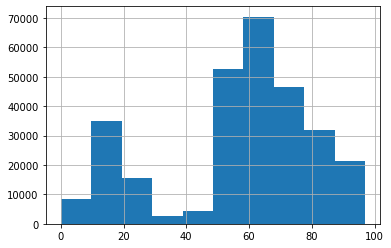

In [7]:
pokemoncut['cityR'].hist()

Test for Normality 

In [8]:
#Single Sample t-test
stats.ttest_1samp(pokemon['cityR'], 25000)

Ttest_1sampResult(statistic=nan, pvalue=nan)

Pokemon appear by class 

<AxesSubplot:>

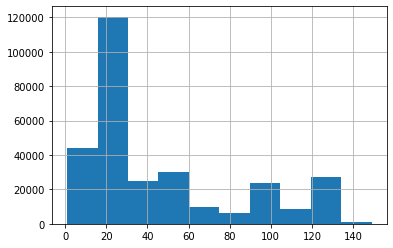

In [9]:
pokemon['class'].hist()

Test for Normality 

In [10]:
#Single sample t-test
stats.ttest_1samp(pokemon['class'], 25000)

Ttest_1sampResult(statistic=-342827.0256986259, pvalue=0.0)

Test for Normality 

Independent t-test

In [12]:
#import packages 
from scipy.stats import ttest_ind

In [15]:
pokemoncut.cityR[pokemoncut.class == '16'].hist()

SyntaxError: invalid syntax (2672841155.py, line 1)